![](https://imgdb.in/k2fn.jpg)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import koreanize_matplotlib

In [2]:
# generate data : 월평균 주가

# 월
m2020 = ["2020-01", "2020-02", "2020-03", "2020-04", "2020-05", "2020-06", "2020-07", "2020-08", "2020-09", "2020-10",
         "2020-11", "2020-12"]  # x축 레이블로 사용

# 삼성전자 월평균 주가
sec = [
    58_842, 58_988, 50_357, 49_086, 49_086, 52_968, 54_828, 57_170, 58_176, 59_787, 63_255, 73_343
]

# 카카오 월평균 주가
kakao = [
    32_640, 35_182, 31_920, 33_615, 45_613, 52_834, 64_459, 74_602, 75_905, 71_392, 72_355, 75_260
]
# LG전자 월평균 주가
lge = [
    68_860, 65_820, 52_949, 52_748, 56_216, 65_089, 70_857, 84_090, 89_524, 90_789, 87_202, 99_738
]
# 현대자동차 월평균 주가
hdm = [
    119_700, 128_012, 91_800, 93_258, 94_808, 103_291, 111_326, 158_588, 176_226, 173_697, 176_762, 189_095
]


In [3]:
# # generate data : 월평균 주가

# # 월
# m2021 = ["2021-01", "2021-02", "2021-03", "2021-04", "2021-05", "2021-06", "2021-07", "2021-08", "2021-09", "2021-10", "2021-11", "2021-12"]

# # 삼성전자 월평균 주가
# sec = sec_2021
# [
#     58842, 58988, 50357, 49086, 49086, 52968, 54828, 57170, 58176, 59787, 63255, 73343
# ]

# # 카카오 월평균 주가
# kakao = kakao_2021
# [
#     32640, 35182, 31920, 33615, 45613, 52834, 64459, 74602, 75905, 71392, 72355, 75260
# ]
# # LG전자 월평균 주가
# lge = lge_2021
# [
#     68860, 65820, 52949, 52748, 56216, 65089, 70857, 84090, 89524, 90789, 87202, 99738
# ]
# # 현대자동차 월평균 주가
# hdm = hdm_2021
# [
#     119700, 128012, 91800, 93258, 94808, 103291, 111326, 158588, 176226, 173697, 176762, 189095
# ]


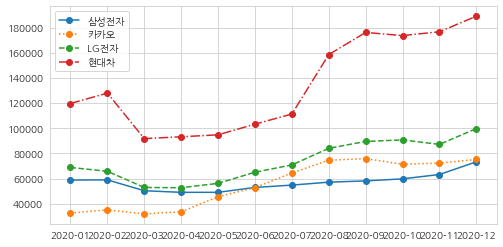

In [4]:
# 1. 상태기반(state-based interface) : 시간순으로 그림을 그림.
plt.figure(figsize=(8, 4))  # 8x4인치 면적의 스케치북에 그림을 그리겠다.
plt.plot(m2020, sec, "o-", label="삼성전자")
plt.plot(m2020, kakao, "o:", label="카카오")
plt.plot(m2020, lge, "o--", label="LG전자")
plt.plot(m2020, hdm, "o-.", label="현대차")
plt.legend()
# 탭10이라는, 태블로의 컬러스킴을 그대로 가져옴.


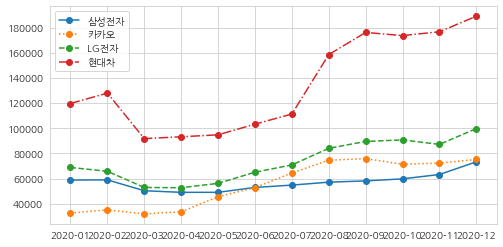

In [5]:
# 2. 객체지향(object-oriented interface)

fig, ax = plt.subplots(figsize=(8, 4))  # fig라는 도화지를 하나 깔아 줌. 도화지의 크기는 8x4인치. ax=좌표축
ax.plot(m2020, sec, "o-", label="삼성전자")
ax.plot(m2020, kakao, "o:", label="카카오")
ax.plot(m2020, lge, "o--", label="LG전자")
ax.plot(m2020, hdm, "o-.", label="현대차")
ax.legend()

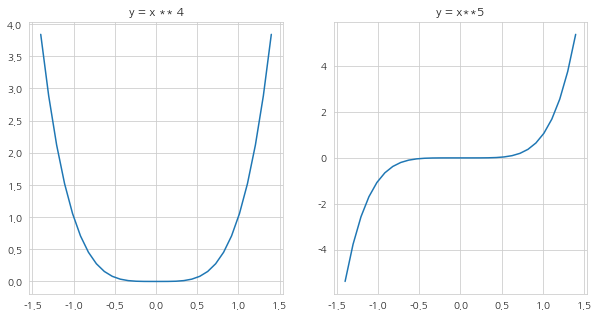

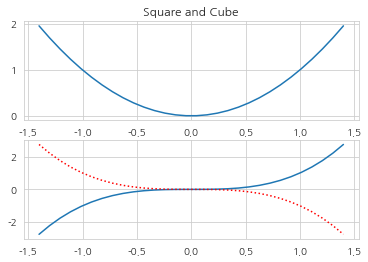

In [6]:
# 상태기반 샘플
x = np.linspace(-1.4, 1.4, 30)  # [-1.400, -1.303, -1.207, ..., 1.303, 1.400]

plt.figure(1)  # 첫 번째 도화지 생성 및 선택.
plt.subplot(211)  # "2행1열의 그리드 중 첫 번째 칸(윗칸)에 그리겠다."
plt.plot(x, x ** 2)  # "y=x**2" 의 그래프를 그려라.
plt.title("Square and Cube")  # subplot(211) 그리드에 제목 달아주기.
plt.subplot(212)  # "2행1열의 그리드 중 두 번째 칸(아랫칸)에 그리겠다."
plt.plot(x, x ** 3)  # "y=x**3"의 그래프를 그려라.

plt.figure(2, figsize=(10, 5))  # 또 다른 도화지 생성 및 선택. 사이즈는 10x5인치. (DPI나 해상도 설정은 별도)
plt.subplot(121)  # "1행2열의 그리드 중 첫 번째(왼쪽칸)에 그리겠다."
plt.plot(x, x ** 4)  # "y=x**4" 의 그래프를 그려라.
plt.title("y = x ** 4")  # subplot(121) 그리드에 제목 달아주기.
plt.subplot(122)  # "1행2열의 그리드 중 두 번째(오른쪽칸)에 그리겠다."
plt.plot(x, x ** 5)  # "y=x**5"의 그래프를 그려라.
plt.title("y = x**5")  # subplot(122)그리드에 제목 달아주기.

plt.figure(1)  # 다시 1번 도화지 선택(이 때 1번도화지가 2번도화지 아래로 내려감;;)
plt.plot(x, -x ** 3, "r:")  # 1번도화지 안에서 마지막으로 선택했던 subplot(212)에 "y=-x**3" 그래프를 겹쳐그려라.

plt.show()  # 이미지를 출력해라. 끝.

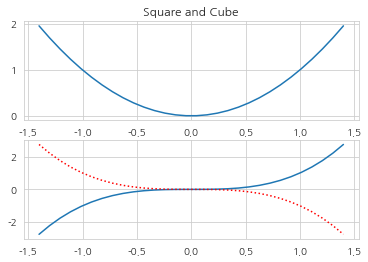

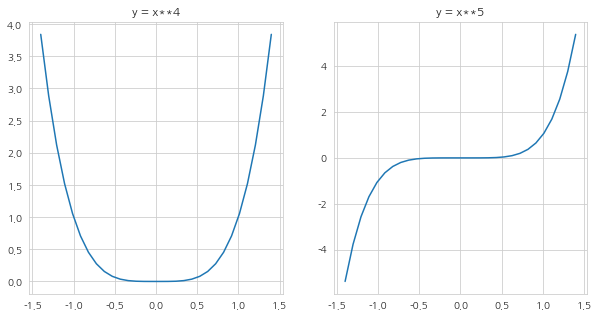

In [7]:
# 객체기반 샘플

x = np.linspace(-1.4, 1.4, 30)  # [-1.400, -1.303, -1.207, ..., 1.303, 1.400]
fig1, ax1 = plt.subplots(nrows=2, ncols=1)  # 도화지와 그리드를 한 번에 생성(2행1열)

ax1[0].plot(x, x ** 2)  # 그리드는 리스트인덱싱으로 선택(A1). "y=x**2"의 그래프를 그려라.
ax1[0].set_title("Square and Cube")  # 해당 그리드의 제목 설정

ax1[1].plot(x, x ** 3)  # 다음 그리드(B1)에 "y=x**3" 그래프 그리기.

fig2, ax2 = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))  # 또 다른 도화지(10x5 inch)를 만들고, 1행2열로 나눠라.
ax2[0].plot(x, x ** 4)  # 첫 번째칸(A1)에 "y=x**4"의 그래프를 그려라.
ax2[0].set_title("y = x**4")  # 해당 칸의 제목을 설정.

ax2[1].plot(x, x ** 5)  # 두 번째칸(A2)에 해당 그래프 작성.
ax2[1].set_title("y = x**5")  # 해당 칸에 제목 설정.

ax1[1].plot(x, -x ** 3, "r:")  # 먼저 그렸던 ax1의 두 번째 칸(B1)에 그래프 겹쳐서 하나 더 그리기(fig의 순서가 바뀌지 않음)
plt.show()  # 화면에 이미지 출력(생략가능)

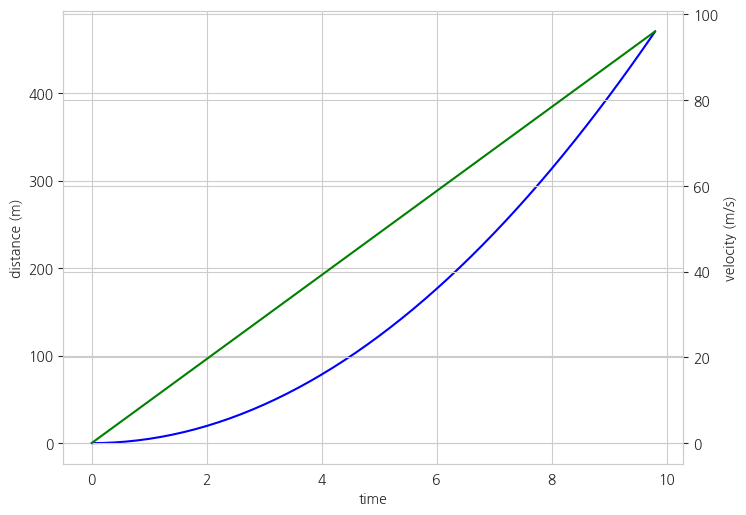

In [8]:
# 비교샘플2
# 출처 : https://matplotlib.org/matplotblog/posts/pyplot-vs-object-oriented-interface/

import numpy as np

time = np.arange(0., 10., 0.2)
velocity = np.zeros_like(time, dtype=float)
distance = np.zeros_like(time, dtype=float)

g = 9.8  # m/s^2
velocity = g * time
distance = 0.5 * g * np.power(time, 2)

fig, ax1 = plt.subplots()


ax1.set_ylabel("distance (m)")
ax1.set_xlabel("time")
ax1.plot(time, distance, "blue")

ax2 = ax1.twinx()  # x축을 공유하는 새로운 y축을 오른편에 생성(기존 y축은 왼편)

ax2.set_ylabel("velocity (m/s)")
ax2.set_xlabel("time")
ax2.plot(time, velocity, "green")

fig.set_size_inches(8, 6)  # 크기
fig.set_dpi(100)  # 해상도(DPI)

plt.show()

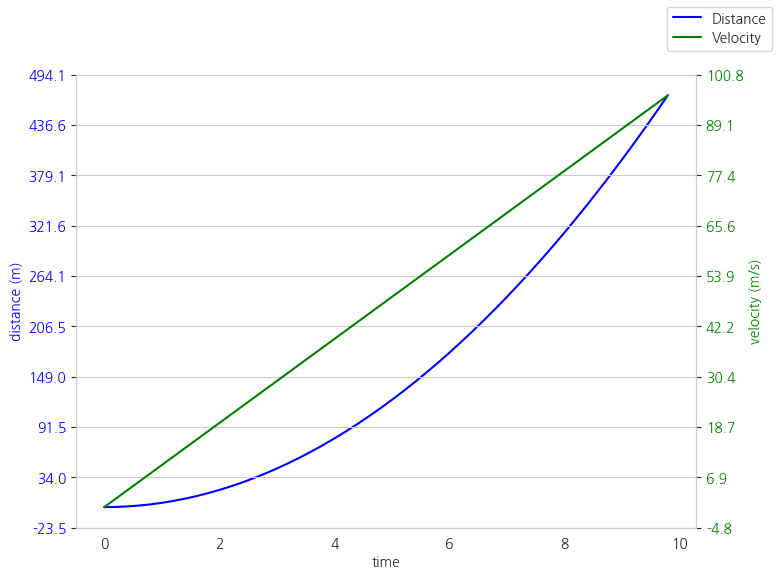

In [9]:
fig, ax1 = plt.subplots()

ax1.set_ylabel("distance (m)", color="blue")
ax1.set_xlabel("time")
ax1.plot(time, distance, "blue")
ax1.set_yticks(np.linspace(*ax1.get_ybound(), 10))
ax1.tick_params(axis="y", labelcolor="blue")
ax1.xaxis.grid()
ax1.yaxis.grid()

ax2 = ax1.twinx()  # create another y-axis sharing a common x-axis

ax2.set_ylabel("velocity (m/s)", color="green")
ax2.set_xlabel("time")

ax2.tick_params(axis="y", labelcolor="green")
ax2.plot(time, velocity, "green")
ax2.set_yticks(np.linspace(*ax2.get_ybound(), 10))

fig.set_size_inches(8, 6)
fig.set_dpi(100)
fig.legend(["Distance", "Velocity"])
plt.show()

[Text(0, 0, '0'),
 Text(0, 1, '1'),
 Text(0, 2, '2'),
 Text(0, 3, '3'),
 Text(0, 4, '4')]

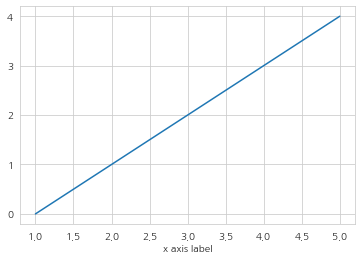

In [10]:
x = [1, 2, 3, 4, 5]
y = [0, 1, 2, 3, 4]

# Figure와 Axes 생성
fig, ax = plt.subplots()

# Axes에 data 그리기
ax.plot(x, y)

# x축 이름 붙이기
ax.set_xlabel("x axis label")

# y축 눈금 조정
yticks = [0, 1, 2, 3, 4]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)

# 그림 저장
# fig.savefig("my_figure.png")

In [11]:
# 그림에는 목적이 있다.
# 네 개 중에 어디에 투자를 할까? 그러면 수익률을 따져야 할 것.
# 이걸 기준으로 시각화를 해 보자.
# 그림이 아니라 데이터를 건드려야 한다.

In [12]:
# 수익률 비교
# 월별 평균 주가 연초 시초가로 나눔

sec_rate = np.array(sec) / sec[0] - 1
kakao_rate = np.array(kakao) / kakao[0] - 1
lge_rate = np.array(lge) / lge[0] - 1
hdm_rate = np.array(hdm) / hdm[0] - 1

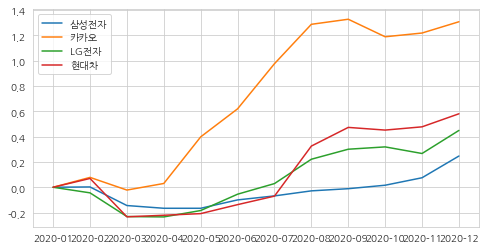

In [13]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(m2020, sec_rate, label="삼성전자")
ax.plot(m2020, kakao_rate, label="카카오")
ax.plot(m2020, lge_rate, label="LG전자")
ax.plot(m2020, hdm_rate, label="현대차")
ax.legend()

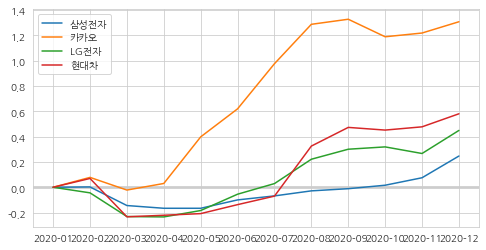

In [14]:
# 손익이 잘 드러나게 변경

ax.axhline(y=0, c="lightgray", lw=3, zorder=0)
display(fig)

In [15]:
# 시각화를 다르게 하면서 우리가 보고 싶은 정보를 볼 수가 있었음.

(-0.5, 1.5)

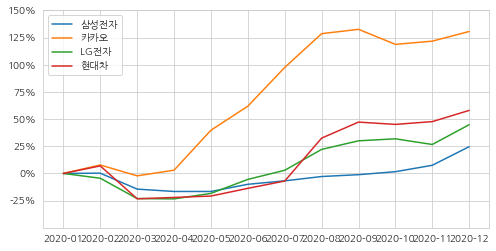

In [16]:
# y축 눈금 정비

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(m2020, sec_rate, label="삼성전자")
ax.plot(m2020, kakao_rate, label="카카오")
ax.plot(m2020, lge_rate, label="LG전자")
ax.plot(m2020, hdm_rate, label="현대차")
ax.legend()

yticks = np.arange(-0.25, 1.75, 0.25)
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y * 100:.0f}%" for y in yticks])  # == ax.set_yticklabels([f"{int(y*100)}%" for y in yticks])
ax.set_ylim(-0.5, )  # ax.set_ylim(-0.5, 1.75) 식으로도 가능.

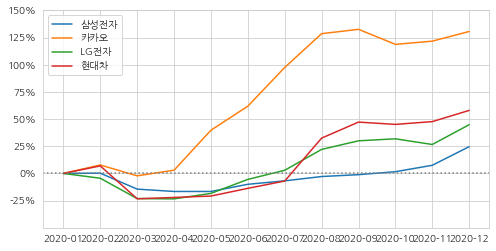

In [17]:
ax.axhline(y=0, c="gray", ls=":")
display(fig)

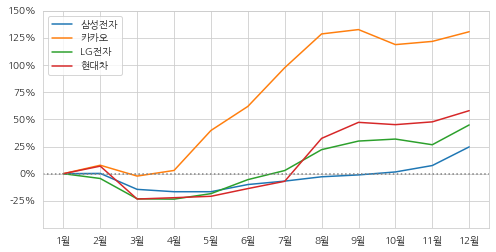

In [18]:
# 가로축을 깔끔하게 변경

xticklabels = [f"{i}월" for i in range(1, 13)]
# xticklabels[0] = "2020년 1월"
ax.set_xticks(range(0, 12))
ax.set_xticklabels(xticklabels)
display(fig)

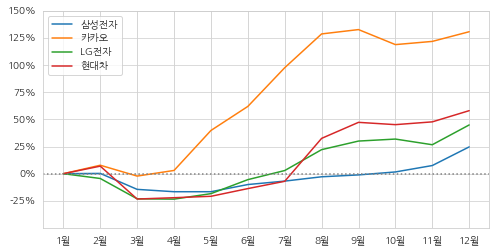

In [19]:
# y축 grid 추가

ax.grid(axis="y", c="lightgray")
display(fig)

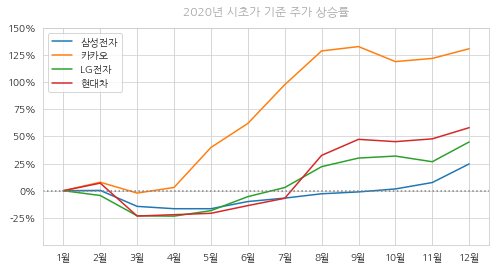

In [20]:
# title 추가

ax.set_title("2020년 시초가 기준 주가 상승률",
             fontweight="bold",
             fontsize="large",
             color="darkgray",
             pad=12)
display(fig)

In [21]:
# 기업 색상

sec_c = np.array([52, 117, 162]) / 255  # 12, 77, 162  현대차와 비슷
kakao_c = np.array([230, 207, 1]) / 255  # 250, 227, 1
lge_c = np.array([203, 10, 55]) / 255
hdm_c = np.array([1, 44, 95]) / 255

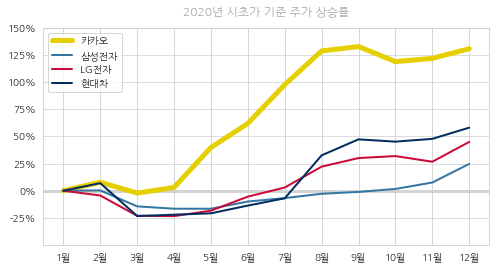

In [22]:
# 카카오 강조

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(m2020, kakao_rate, c=kakao_c, lw=5, label="카카오")
ax.plot(m2020, sec_rate, c=sec_c, lw=2, label="삼성전자")
ax.plot(m2020, lge_rate, c=lge_c, lw=2, label="LG전자")
ax.plot(m2020, hdm_rate, c=hdm_c, lw=2, label="현대차")

xticklabels = [f"{i}월" for i in range(1, 13)]
ax.set_xticks(range(0, 12))
ax.set_xticklabels(xticklabels)

yticks = np.arange(-0.25, 1.75, 0.25)
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y * 100:.0f}%" for y in yticks])
ax.set_ylim(-0.5, )

ax.grid(axis="y", c="lightgray")
ax.axhline(y=0, c="lightgray", lw=3, zorder=0)

ax.set_title("2020년 시초가 기준 주가 상승률",
             fontweight="bold", fontsize="large", color="darkgray", pad=12)

ax.legend()

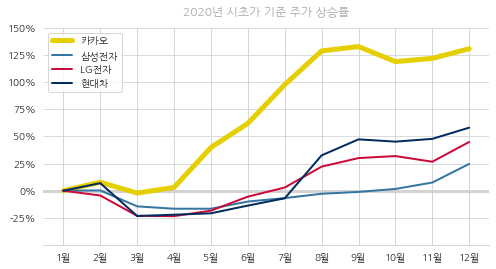

In [23]:
# 불필요한 테두리 지우기
# 시각적 방해를 줄여서 데이터에 집중할 수 있도록 함
# legend를 빼도 될 것.
# 테두리(spine척추)도 필요 없음. 논문이라면 테두리를 넣는 것이 좋을 것.
# ppt나 웹이라면 빼는 게 깔끔함.

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(m2020, kakao_rate, c=kakao_c, lw=5, label="카카오")
ax.plot(m2020, sec_rate, c=sec_c, lw=2, label="삼성전자")
ax.plot(m2020, lge_rate, c=lge_c, lw=2, label="LG전자")
ax.plot(m2020, hdm_rate, c=hdm_c, lw=2, label="현대차")

xticklabels = [f"{i}월" for i in range(1, 13)]
ax.set_xticks(range(0, 12))
ax.set_xticklabels(xticklabels)

yticks = np.arange(-0.25, 1.75, 0.25)
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y * 100:.0f}%" for y in yticks])
ax.set_ylim(-0.5, )

ax.grid(axis="y", c="lightgray")
ax.axhline(y=0, c="lightgray", lw=3, zorder=0)

ax.spines[["left", "top", "right"]].set_visible(False)  # 테두리 지우기

ax.set_title("2020년 시초가 기준 주가 상승률",
             fontweight="bold", fontsize="large", color="darkgray", pad=12)

ax.legend()

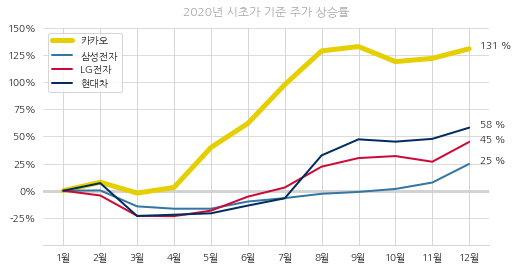

In [24]:
# 이제 그래프에 좀 더 눈이 간다.
# 면도하다 만 것처럼 왼쪽에 털이 있다. (tick)
# 퍼센트는 얼마나 올랐는지 보고 싶어서
# 주가는 골고루 분포하고 있다.
# 12월에 얼마나 올랐는지만 중요하므로
# text를 넣자.

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(m2020, kakao_rate, c=kakao_c, lw=5, label="카카오")
ax.plot(m2020, sec_rate, c=sec_c, lw=2, label="삼성전자")
ax.plot(m2020, lge_rate, c=lge_c, lw=2, label="LG전자")
ax.plot(m2020, hdm_rate, c=hdm_c, lw=2, label="현대차")

# 상승률
for r in [kakao_rate[-1], sec_rate[-1], lge_rate[-1], hdm_rate[-1]]:
    ax.text(11.3, r, f"{r * 100:.0f} %")

xticklabels = [f"{i}월" for i in range(1, 13)]
ax.set_xticks(range(0, 12))
ax.set_xticklabels(xticklabels)

yticks = np.arange(-0.25, 1.75, 0.25)
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y * 100:.0f}%" for y in yticks])
ax.set_ylim(-0.5, )

ax.grid(axis="y", c="lightgray")
ax.axhline(y=0, c="lightgray", lw=3, zorder=0)

ax.spines[["left", "top", "right"]].set_visible(False)  # 테두리 지우기

ax.set_title("2020년 시초가 기준 주가 상승률",
             fontweight="bold", fontsize="large", color="darkgray", pad=12)

ax.legend()

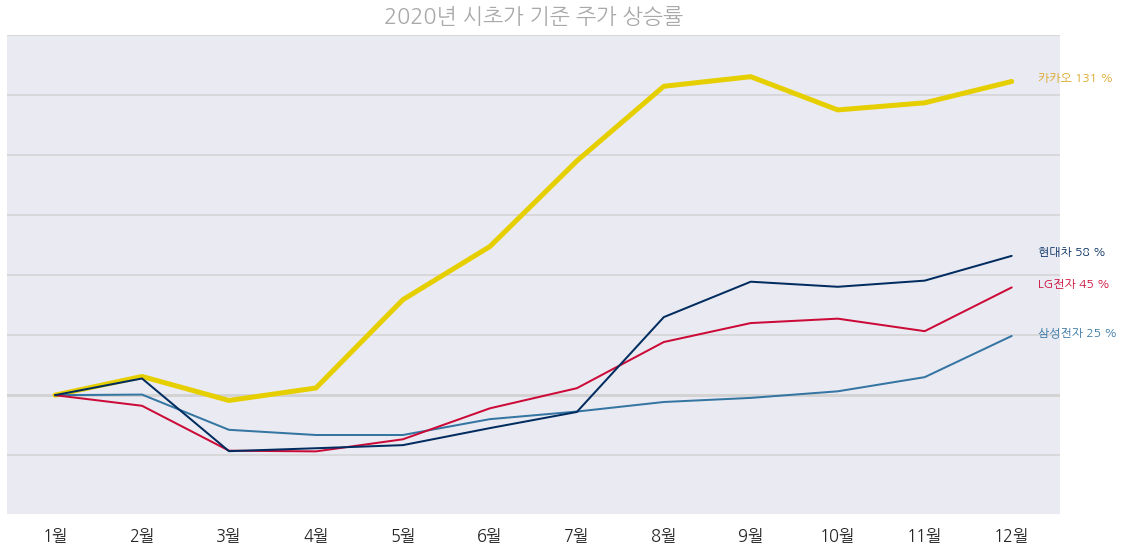

In [34]:
# legend 떼고 회사 색상 입히기, y축 눈금 제거하기
# 털(tick)도 빼보자. 지우는 게 아님. 그리드도 없어져버린다.

fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(m2020, kakao_rate, c=kakao_c, lw=5, label="카카오")
ax.plot(m2020, sec_rate, c=sec_c, lw=2, label="삼성전자")
ax.plot(m2020, lge_rate, c=lge_c, lw=2, label="LG전자")
ax.plot(m2020, hdm_rate, c=hdm_c, lw=2, label="현대차")

# 회사 이름 + 상승률

rates = [kakao_rate[-1], sec_rate[-1], lge_rate[-1], hdm_rate[-1]]
companies = ["카카오", "삼성전자", "LG전자", "현대차"]
colors = ["goldenrod", sec_c, lge_c, hdm_c]  # 글자는 좀 더 어두워야 함

for r, co, c in zip(rates, companies, colors):
    ax.text(11.3, r, f"{co} {r * 100:.0f} %", color=c, fontsize=12)

xticklabels = [f"{i}월" for i in range(1, 13)]
ax.set_xticks(range(0, 12))
ax.set_xticklabels(xticklabels)

yticks = np.arange(-0.25, 1.75, 0.25)
ax.set_yticks(yticks)
ax.set_yticklabels([])
# ax.set_yticklabels([f"{y*100:.0f}%" for y in yticks])
ax.tick_params(axis="y", length=0)  # y축 틱 지우기
ax.set_ylim(-0.5, )

ax.grid(axis="y", c="lightgray")
ax.axhline(y=0, c="lightgray", lw=3, zorder=0)

ax.spines[["left", "top", "right"]].set_visible(False)  # 테두리 지우기

ax.set_title("2020년 시초가 기준 주가 상승률",
             fontweight="bold", fontsize="large", color="darkgray", pad=12)

fig.tight_layout()

In [35]:
# 이렇게까지 그림을 그릴 경우가 언제일까?
# 만약 머신러닝을 위해 데이터 양상을 나 혼자 보려면 대충 하다 말아도 됨.
# 나는 주물럭거리다 보니까 보이는 것!
#
# 보고를 받을 때에는 "결과만 덜렁" 보는데 이렇게 가져가면 보기 힘든 그래프.
# 레전드 보고 왔다갔다 매치 시켜야 하고, 숫자도 세어야 함.
# 빠르게 판단을 해야 하는데, "어느 게 LG고 현대차야?" 물어보게 만들면 혼나는 것.
# 그래서 결과적으로 "카카오가 제일 많이 올랐고 삼성전자는 사람들이 많이 올라탔는데, 무거워서 그런지 많이 안 올랐어요."
# 제한된 시간 내에서 판단해야 하는 사람들 입장에서는 이렇게 표현해야 한다.
# 뭔가 "이렇게 하고 싶다"고 생각했을 때 그 기능을 구현할 수 있어야 하기 때문에 공부를 하는 것.

![](https://imgdb.in/k2e6.jpg)

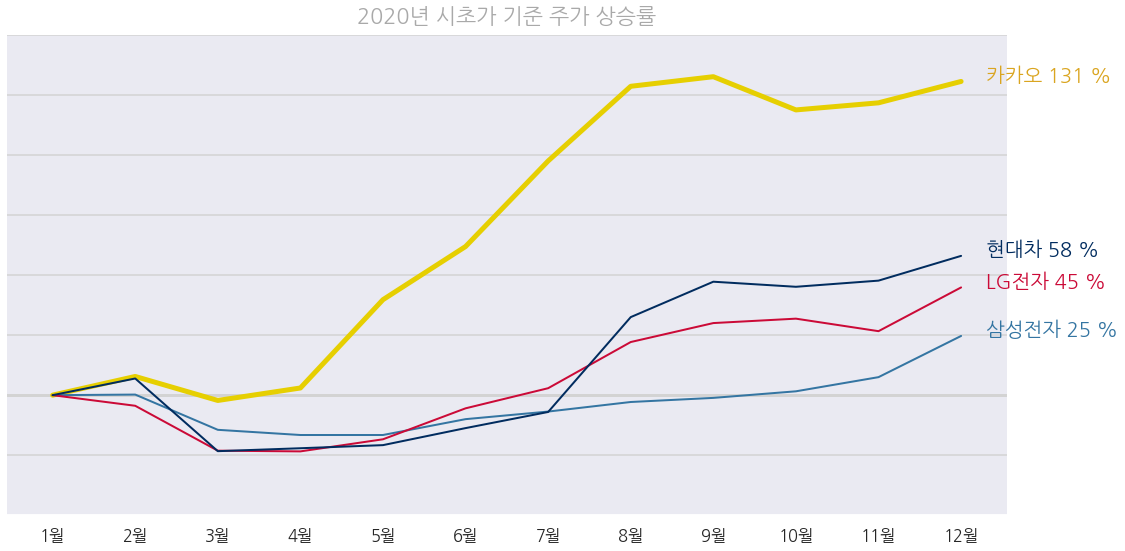

In [47]:
# context 설정
sns.set_context("talk")  # 그 외에도 poster, paper, notebook 등

fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(m2020, kakao_rate, c=kakao_c, lw=5, label="카카오")
ax.plot(m2020, sec_rate, c=sec_c, lw=2, label="삼성전자")
ax.plot(m2020, lge_rate, c=lge_c, lw=2, label="LG전자")
ax.plot(m2020, hdm_rate, c=hdm_c, lw=2, label="현대차")

# 회사 이름 + 상승률

rates = [kakao_rate[-1], sec_rate[-1], lge_rate[-1], hdm_rate[-1]]
companies = ["카카오", "삼성전자", "LG전자", "현대차"]
colors = ["goldenrod", sec_c, lge_c, hdm_c]  # 글자는 좀 더 어두워야 함

for r, co, c in zip(rates, companies, colors):
    ax.text(11.3, r, f"{co} {r * 100:.0f} %", color=c, fontsize=20)
    # x좌표, y좌표, 문자열, 컬러, 크기 설정

xticklabels = [f"{i}월" for i in range(1, 13)]
ax.set_xticks(range(0, 12))  # x축 틱 구간의 갯수(11칸)을 먼저 설정(생략시 UserWarning)
ax.set_xticklabels(xticklabels)  # 구간별 값 설정

yticks = np.arange(-0.25, 1.75, 0.25)
ax.set_yticks(yticks)
ax.set_yticklabels([])
# ax.set_yticklabels([f"{y*100:.0f}%" for y in yticks])
ax.tick_params(axis="y", length=0)  # y축 틱 지우기(길이를 0으로)
ax.set_ylim(-0.5, )  # 아랫쪽 여백을 위해 y축 시작점을 -50%로

ax.grid(axis="y", c="lightgray")  # y축 그리드 그리기
ax.axhline(y=0, c="lightgray", lw=3, zorder=0)  # 수평선 그리기

ax.spines[["left", "top", "right"]].set_visible(False)  # 테두리 지우기(투명설정)

ax.set_title("2020년 시초가 기준 주가 상승률",
             fontweight="bold", fontsize="large", color="darkgray", pad=12)

fig.tight_layout()

![](https://imgdb.in/k2ei.jpg)

![](https://imgdb.in/k2eq.jpg)
## https://www.color-hex.com/color-names.html

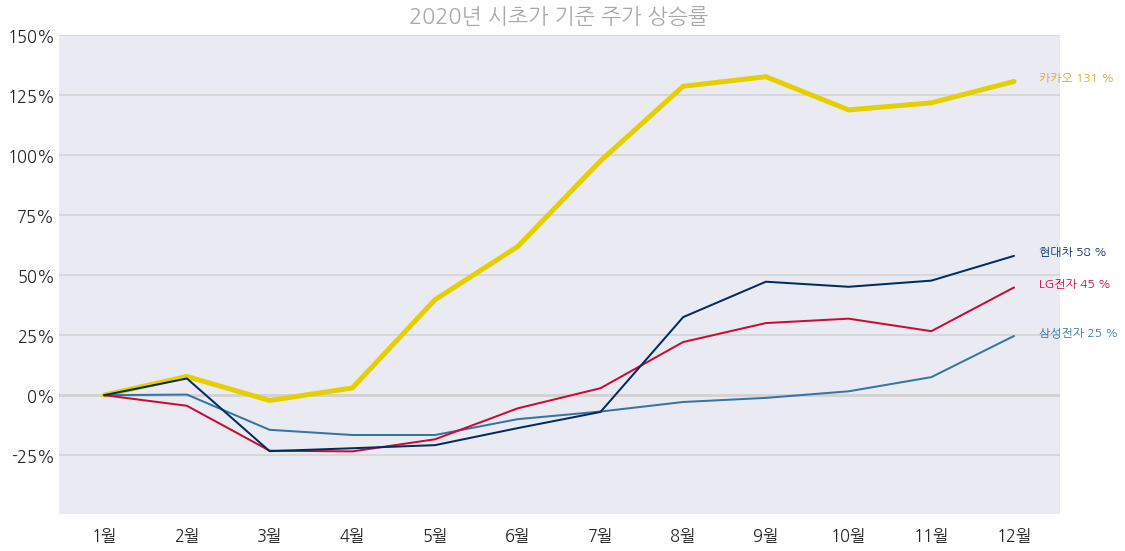

In [50]:
# style 설정
sns.set_style("dark")  # ticks, white, whitegrid
plt.rc("font", family="NanumGothic")  # 폰트 설정(나눔고딕)

fig, ax = plt.subplots(figsize=(16, 8))

# 네 개 차트 겹쳐그리기(for문으로 그리지 않고 각각 설정값을 다르게)
ax.plot(m2020, kakao_rate, c=kakao_c, lw=5, label="카카오")
ax.plot(m2020, sec_rate, c=sec_c, lw=2, label="삼성전자")
ax.plot(m2020, lge_rate, c=lge_c, lw=2, label="LG전자")
ax.plot(m2020, hdm_rate, c=hdm_c, lw=2, label="현대차")

# 우측 레이블(회사 이름 + 상승률)
rates = [kakao_rate[-1], sec_rate[-1], lge_rate[-1], hdm_rate[-1]]
companies = ["카카오", "삼성전자", "LG전자", "현대차"]
colors = ["goldenrod", sec_c, lge_c, hdm_c]  # 글자는 선보다 바탕색 대비 좀 더 어두워야 가독성 up!

for r, co, c in zip(rates, companies, colors):
    ax.text(11.3, r, f"{co} {r * 100:.0f} %", color=c, fontsize=12)

xticklabels = [f"{i}월" for i in range(1, 13)]
ax.set_xticks(range(0, 12))
ax.set_xticklabels(xticklabels)

yticks = np.arange(-0.25, 1.75, 0.25)
ax.set_yticks(yticks)
ax.set_yticklabels([])
ax.set_yticklabels([f"{y*100:.0f}%" for y in yticks])
ax.tick_params(axis="y", length=0)  # y축 틱 지우기
ax.set_ylim(-0.5, )

ax.grid(axis="y", c="lightgray")
ax.axhline(y=0, c="lightgray", lw=3, zorder=0)

ax.spines[["left", "top", "right"]].set_visible(False)  # 테두리 지우기

ax.set_title("2020년 시초가 기준 주가 상승률",
             fontweight="bold", fontsize="large", color="darkgray", pad=12)

fig.tight_layout()

# 끝!

In [29]:
# Appendix. 주가 데이터 가져오기

import pandas as pd
import pandas_datareader.data as web
import datetime

In [51]:
# https://jjeongil.tistory.com/656

# file_name 다운로드한 주가 데이터를 저장할 파일 이름
# company_code 종목 코드
# year1/month1/date1 데이터를 다운로드할 시작일
# year2/month2/date2 데이터를 다운로드할 마감일
# 고가, 저가, 시초가, 종가, 거래량, 보정종가(주식의 분할 배당 배분 등을 고려해 조정한 종가)


def download_stock_data(file_name, company_code, year1, month1, date1, year2, month2, date2):
    start = datetime.datetime(year1, month1, date1)
    end = datetime.datetime(year2, month2, date2)
    # df = web.DataReader("%s.KS" % (company_code), "yahoo", start, end)
    df = web.DataReader(f"{company_code}.KS", "yahoo", start, end)
    df.to_pickle(file_name)
    return df


def load_stock_data(file_name):
    df = pd.read_pickle(file_name)
    return df


download_stock_data("sec.data", "005930", 2017, 1, 1, 2021, 12, 31)
df_sec = load_stock_data("sec.data")

download_stock_data("lge.data", "066570", 2017, 1, 1, 2021, 12, 31)
df_lge = load_stock_data("lge.data")

download_stock_data("kakao.data", "035720", 2017, 1, 1, 2021, 12, 31)
df_kakao = load_stock_data("kakao.data")

download_stock_data("hdm.data", "005380", 2017, 1, 1, 2021, 12, 31)
df_hdm = load_stock_data("hdm.data")


In [52]:
df_sec

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,36240.0,35880.0,35980.0,36100.0,4650600.0,31166.375000
2017-01-03,36620.0,36020.0,36280.0,36480.0,7357650.0,31494.437500
2017-01-04,36520.0,36100.0,36500.0,36160.0,7971750.0,31218.173828
2017-01-05,36060.0,35540.0,36060.0,35560.0,10967450.0,30700.177734
2017-01-06,36440.0,36040.0,36180.0,36200.0,8880950.0,31252.705078
...,...,...,...,...,...,...
2021-12-24,80800.0,80200.0,80200.0,80500.0,12086380.0,79725.992188
2021-12-27,80600.0,79800.0,80600.0,80200.0,10783368.0,79428.882812
2021-12-28,80400.0,79700.0,80200.0,80300.0,18226325.0,79527.921875


In [32]:
def calc_mavg(df):  # 월별 평균
    df = df.reset_index()
    df["y_m"] = df["Date"].dt.to_period("M")
    df["avg"] = df[["Open", "Close"]].mean(axis=1)
    return np.round(df.groupby("y_m").mean()["avg"].values, 0).astype(int)


sec_2021 = calc_mavg(df_sec)[-12:]  # 최근 12개(2021. 1~12월 데이터)
kakao_2021 = calc_mavg(df_kakao)[-12:]
lge_2021 = calc_mavg(df_lge)[-12:]
hdm_2021 = calc_mavg(df_hdm)[-12:]

In [33]:
# 위 array(pd.Series)는 5년치임. 최근 1년치는 마지막 12개.

sec_2021

array([86465, 83200, 82161, 83686, 80534, 81150, 79611, 77114, 76416,
       70708, 71700, 77666])